# Black Box Optimization through Machine Learning (Python version)

## 1. Data Wrangling

### Import

###### Generalities

In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
# Get the parent directory of the current notebook's directory
notebook_dir = os.getcwd()
parent_dir = os.path.dirname(notebook_dir)

# Join the parent directory with "initial data"
data_path = os.path.join(parent_dir, "data")

###### Initial data

In [3]:
# import initial data

impInputInit = []

for i in range(1,9):
    pth = os.path.join(data_path, "initial_data","function_"+str(i),"initial_inputs.npy")
    impInputInit.append(np.load(pth, allow_pickle=True))

impOutputInit = []

for i in range(1,9):
    pth = os.path.join(data_path, "initial_data","function_"+str(i),"initial_outputs.npy")
    impOutputInit.append(np.load(pth, allow_pickle=True))

###### Weekly data

In [4]:
# function for transforming txt strings into np arrays

def imp_txt_to_np_array(file_path,type="input"):
    if type=="input":
        dlt="), array("
        srt=7
    elif type=="output":
        dlt="), np.float64("
        srt=12
    with open(file_path) as f:
        imp = f.read()
        imp = imp.split("]\n[")
        imp=imp[-1]
        imp = imp[srt:-2].split(dlt)
        #print(imp) if type=="output" else None

    impn = []
    for i in range(len(imp)):
        if type=="input":
            imp[i]=imp[i][1:-1].split(",")
            for j in range(len(imp[i])):
                imp[i][j]=float(imp[i][j])
            impn.append(np.array(imp[i]))
        elif type=="output":
            impn.append(float(imp[i]))
    return impn

In [5]:
# import new weekly data

week_now = 6

impInputNew=[]


for j in range(1, week_now +1):
    pth=os.path.join(data_path,"incremental_data", "week_"+str(j),"inputs.txt")
    impInputNew.append(imp_txt_to_np_array(pth))


new=[[] for _ in range(len(impInputNew[0]))]

for i in range(len(impInputNew[0])):
    for n in range(week_now):
        new[i].append(impInputNew[n][i])

impInputIncr=[None for i in range(8)]


for i in range(len(new)):
    #print(len(impInputInit[i])) #check
    impInputIncr[i]=impInputInit[i]

for nw_idx, nw in enumerate(impInputNew):
    for i in range(len(new)):
        impInputIncrn = impInputIncr[i]
        impInputIncrn = np.append( impInputIncrn,[np.asarray(new[i][nw_idx])] , axis=0)

        impInputIncr[i] = impInputIncrn

#check
#print("\n")
#for i in range(len(new)):
#    print(len(impInputIncr[i]))
#    print(len(impInputIncr[i][-1]))



impOutputNew=[]


for j in range(1, week_now +1):
    pth=os.path.join(data_path,"incremental_data", "week_"+str(j),"outputs.txt")
    impOutputNew.append(imp_txt_to_np_array(pth,type="output"))


new=[[] for _ in range(len(impOutputNew[0]))]

for i in range(len(impOutputNew[0])):
    for n in range(week_now):
        new[i].append(impOutputNew[n][i])

impOutputIncr=[None for i in range(8)]


for i in range(len(new)):
    #print(len(impOutputInit[i])) #check
    impOutputIncr[i]=impOutputInit[i]

for nw_idx, nw in enumerate(impOutputNew):
    for i in range(len(new)):
        impOutputIncrn = impOutputIncr[i]
        impOutputIncrn = np.append( impOutputIncrn,[np.asarray(new[i][nw_idx])] , axis=0)

        impOutputIncr[i] = impOutputIncrn

#check
#print("\n")
#for i in range(len(new)):
#    print(len(impOutputIncr[i]))
#    print(len(impOutputIncr[i][0]))


### Main definitions

In [6]:
#data

data=[]

for i in range(len(impInputIncr)):
    data.append(list(zip(impInputIncr[i], impOutputIncr[i])))

#print(data[1])

#print(list(map(lambda x: x[0], data[0])))

dimensions={0: 2, 1: 2, 2: 3, 3: 4, 4: 4, 5: 5, 6: 6, 7: 8}
positiveQ={0: True, 1: True, 2: False, 3: False, 4: True, 5: True, 6: True, 7: True}
maximumObs={}
for i in range(len(data)):
    maximumObs[i]=max(data[i], key=lambda x: x[1]) if positiveQ[i] else min(data[i], key=lambda x: x[1])

In [7]:
positiveQ

{0: True, 1: True, 2: False, 3: False, 4: True, 5: True, 6: True, 7: True}

In [8]:
datan={}

for i in range(len(data)):
    firsts = list(map(lambda x: tuple(x[0]), data[i]))
    lasts = list(map(lambda x: x[1], data[i]))
    datan[i] = dict(zip(firsts, lasts))
    data[i] = datan[i]



## 2. Progress analysis

### Summary

In [10]:
comaps = {}

for i in range(len(data)):
    comap = []
    comap.append(len(data[i]))
    col = np.array([x[1] for x in data[i]])
    comap.append(np.argmax(col) if positiveQ[i] else np.argmin(col))
    comap.append(max(data[i], key=lambda x: x[1]) if positiveQ[i] else min(data[i], key=lambda x: x[1]))
    comap = np.array(comap,dtype=list).flatten().tolist()
    comap = [comap[0], comap[1], comap[2][0], comap[2][1]]
    comaps[i] = comap


In [11]:
df = pd.DataFrame.from_dict(comaps, orient='index', columns=['Length', 'Best','ArgExtreme', 'Extreme'])
#df.index.name = 'Key'
df


,Length,Best,ArgExtreme,Extreme
0,16,13,"[0.65, 0.65]",0.195741
1,16,14,"[0.5, 0.5]",0.663912
2,21,15,"[0.133333, 0.466667, 0.999999]",-0.458092
3,36,30,"[0.999999, 0.999999, 0.6, 0.933333]",-41.957757
4,26,25,"[0.333333, 0.999999, 0.999999, 0.999999]",4490.109619
5,26,22,"[0.666667, 0.333333, 0.466667, 0.733333, 0.133...",-0.480443
6,36,33,"[0.07, 0.53, 0.27, 0.27, 0.27, 0.67]",1.661386
7,46,42,"[0.0, 0.0, 0.0, 0.0, 0.4, 0.6, 0.4, 0.8]",9.710300


### Weekly (TO DO)

## 3. Computational tools

### Grid search

In [9]:
# grid - generates points from 0 to 1 with (sub+1) points per dimension

def gridAll(k, sub=3):
    dim = dimensions[k]
    axes = [np.linspace(0, 1, sub + 1) for _ in range(dim)]
    grids = np.meshgrid(*axes, indexing='ij')
    return np.stack([g.flatten() for g in grids], axis=-1)

# print(gridAll(0, sub=2))  # Example usage

### Binary data

In [10]:
list(data[0].items())

[((0.31940388883889725, 0.7629593742689353), 1.3226770395454077e-79),
 ((0.5743292145098291, 0.879898104984359), 1.0330782375230975e-46),
 ((0.7310236309563586, 0.7329998764152272), 7.710875114502849e-16),
 ((0.8403534169072556, 0.26473161399676703), 3.341771007676023e-124),
 ((0.6501140597987644, 0.6815263520602101), -0.0036060626443634764),
 ((0.41043713662518566, 0.14755429902998185), -2.1592490357331095e-54),
 ((0.31269115679477755, 0.07872277794971883), -2.0890932702320842e-91),
 ((0.6834181688515067, 0.8610574643936101), 2.5350011535584046e-40),
 ((0.08250725182080587, 0.403487506426324), 3.6067711901420254e-81),
 ((0.8838898288181171, 0.5822539743824439), 6.229856468168659e-48),
 ((0.666666, 0.69), -1.6445052496361258e-05),
 ((0.666666, 0.679), 6.579450379066184e-05),
 ((0.6, 0.666666), 0.0010103002144995835),
 ((0.65, 0.65), 0.19574056182365185),
 ((0.666667, 0.666667), 9.85538144147645e-06),
 ((0.66, 0.66), 0.007957195845138203)]

In [11]:
bdata={}

for k in range(len(data)):
    dt = data[k]
    pq = positiveQ[k]

    values = list(dt.values())
    keys = list(dt.keys())
    qrt = np.percentile(values, 75 if pq else 25)

    if pq:
        bdata[k] = [1 if item[1] > qrt else 0 for item in dt.items()]
    else:
        bdata[k] = [1 if item[1] < qrt else 0 for item in dt.items()]
    bdata[k] = dict(zip(keys, bdata[k]))

## 4. Gaussian Processes

### Train GP predictor

In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
#from sklearn.gaussian_process.kernels import ConstantKernel as C


In [2]:
def create_predictor(X, y):
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-3, 1e2))# RBF()  # Radial basis function kernel
    kernel= RBF()
    gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True, n_restarts_optimizer=10, alpha=1e-6)
    gp.fit(X, y)
    return gp


In [ ]:
predictors=[]

for k in range(8):
    X = list(data[k].keys())
    y = list(data[k].values())
    predictors.append(create_predictor(X, y))



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


### Evaluate GP predictor

In [17]:
# evaluate GP predictor on the grid (vectorized, no slicing)

def pred_eval_fun(k, sub: int):
    X_test = gridAll(k, sub)  # Full grid, no slicing
    y_preds, sigmas = predictors[k].predict(X_test, return_std=True)
    return (y_preds, sigmas)

#def pred_eval_fun(k, grid: list):
#    X_test = grid  # Full grid, no slicing
#    y_preds, sigmas = predictors[k].predict(X_test, return_std=True)
#    return (y_preds, sigmas)


# evaluate ucb acquisition function on the grid (using dicts like WL associations)

def meanGrid(k, sub):
    grid = gridAll(k, sub)
    means, _ = pred_eval_fun(k, sub)
    return {tuple(g): m for g, m in zip(grid, means)}

def stdGrid(k, sub):
    grid = gridAll(k, sub)
    _, stds = pred_eval_fun(k, sub)
    return {tuple(g): s for g, s in zip(grid, stds)}

def beta(k, sub):
    means, stds = pred_eval_fun(k, sub)
    mm = abs(np.mean(means))
    ms = abs(np.mean(stds))
    return mm / ms

def ucbGrid(k, sub):
    means = meanGrid(k, sub)
    stds = stdGrid(k, sub)
    b = beta(k, sub)
    return {pt: abs(means[pt]) + b * stds[pt] for pt in means}

# Find max UCB point (equivalent to TakeLargest[ucbThread[k, sub], 1])
def maxUCB(k, sub):
    ucb = ucbGrid(k, sub)
    return max(ucb.items(), key=lambda x: x[1])



### Results

In [20]:
# Test: find the maximum point of the ucb acquisition function
# WL function 1 = Python function 0 (1-indexed vs 0-indexed)
for i in range(3):
    sub = 20
    print(f"Function {i} beta: {beta(i, sub)}")
    pt, val = maxUCB(i, sub)
    print(f"Max UCB: {pt} -> {val}")

Function 0 beta: 0.2749563096417646
Max UCB: (0.65, 0.65) -> 0.1957533960592562
Function 1 beta: 1.190521980985344
Max UCB: (0.5, 0.5) -> 0.664186619679375
Function 2 beta: 1.0932371668143357
Max UCB: (0.15000000000000002, 0.45, 1.0) -> 0.4688330133147196


In [34]:
for i in range(3,5):
    sub = 20
    print(f"Function {i} beta: {beta(i, sub)}")
    pt, val = maxUCB(i, sub)
    print(f"Max UCB: {pt} -> {val}")

Function 3 beta: 6.59730660364923
Max UCB: (0.0, 0.65, 1.0, 1.0) -> 81.92010968424609
Function 4 beta: 0.37762763971619734
Max UCB: (0.35000000000000003, 1.0, 1.0, 1.0) -> 4532.216589853221


In [36]:
for i in range(5,7):
    sub = 10
    print(f"Function {i} beta: {beta(i, sub)}")
    pt, val = maxUCB(i, sub)
    print(f"Max UCB: {pt} -> {val}")

Function 5 beta: 4.440418307757962
Max UCB: (0.8, 1.0, 0.0, 0.0, 0.7000000000000001) -> 4.186618521299314
Function 6 beta: 0.7796509225606386
Max UCB: (0.1, 0.5, 0.2, 0.2, 0.4, 0.7000000000000001) -> 1.4281516999956407


In [24]:
for i in range(6,7):
    print(f"Function {i} beta: {beta(i, 3)}")
    pt, val = maxUCB(i, 3)
    print(f"Max UCB: {pt} -> {val}")

Function 6 beta: 0.7801423214551242
Max UCB: (0.0, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666) -> 1.024835428287816


In [23]:
for i in range(7,8):
    print(f"Function {i} beta: {beta(i, 3)}")
    pt, val = maxUCB(i, 3)
    print(f"Max UCB: {pt} -> {val}")

Function 7 beta: 18.67868710772353
Max UCB: (0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0) -> 22.858640926373546


In [ ]:
for i in range(len(data)):
    print(f"Function {i} beta: {beta(i, 3)}")
    pt, val = maxUCB(i, 3)
    print(f"Max UCB: {pt} -> {val}")

## 5. Logistic Regression

### Train Logistic Regression classifier

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [52]:
classLR = {}
scalerLR = {}

def get_lr_classifier(k):
    """Train logistic regression classifier for function k"""
    if k not in classLR:
        X = np.array(list(bdata[k].keys()))
        y = np.array(list(bdata[k].values()))

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        clf = LogisticRegression(
            class_weight='balanced',
            max_iter=1000,
            random_state=42
        )
        clf.fit(X_scaled, y)

        classLR[k] = clf
        scalerLR[k] = scaler
    return classLR[k]

# Train all classifiers
for k in range(len(data)):
    get_lr_classifier(k)

In [53]:
# Grid prediction function
def lrGrid(k, sub):
    """Predict on grid using logistic regression"""
    clf = get_lr_classifier(k)
    gr = np.array(gridAll(k, sub))
    preds = clf.predict(scalerLR[k].transform(gr))
    return dict(zip(map(tuple, gr), preds))

# Prediction with probabilities (useful for threshold tuning)
def lrPredict(k, points, threshold=0.5):
    """
    Predict with custom probability threshold
    points: array of input points
    threshold: decision threshold (default 0.5)
    """
    clf = get_lr_classifier(k)
    points_scaled = scalerLR[k].transform(np.array(points))
    probs = clf.predict_proba(points_scaled)[:, 1]
    return (probs >= threshold).astype(int), probs


### Results

In [57]:
# 1. Single point prediction (like your cells 46-48)
for i in range(len(data)):
    pt, val = maxUCB(i, 3)
    pred = get_lr_classifier(i).predict(scalerLR[i].transform([np.array(pt)]))[0]
    print(f"Function {i} LR predicted {pred} for UCB max point: {pt} -> {val}")



Function 0 LR predicted 0 for UCB max point: (0.0, 0.0) -> 0.025107357930970624
Function 1 LR predicted 0 for UCB max point: (0.0, 0.0) -> 0.5725563059788537
Function 2 LR predicted 1 for UCB max point: (0.0, 0.3333333333333333, 1.0) -> 0.3070925237224758
Function 3 LR predicted 0 for UCB max point: (0.0, 0.0, 1.0, 1.0) -> 42.916305720139874
Function 4 LR predicted 1 for UCB max point: (0.3333333333333333, 1.0, 1.0, 1.0) -> 4490.54469663187
Function 5 LR predicted 0 for UCB max point: (0.6666666666666666, 1.0, 0.0, 0.0, 0.6666666666666666) -> 3.937434537288918
Function 6 LR predicted 1 for UCB max point: (0.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666) -> 1.6420692493417537
Function 7 LR predicted 1 for UCB max point: (0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0) -> 22.858640732687476


### Possible extras

In [62]:
# 2. Prediction with probability
def test_lr_on_ucb(k, sub):
    pt, val = maxUCB(k, sub)
    preds, probs = lrPredict(k, [pt])
    print(f"Prediction: {preds[0]}, Probability: {probs[0]:.3f}")
    return preds[0], probs[0]


In [63]:
test_lr_on_ucb(k=0, sub=3)


Prediction: 0, Probability: 0.109


(0, 0.10912957479272495)

In [64]:
test_lr_on_ucb(k=1, sub=3)


Prediction: 0, Probability: 0.239


(0, 0.23907241069694965)

In [65]:
test_lr_on_ucb(k=2, sub=3)


Prediction: 1, Probability: 0.898


(1, 0.898413253723433)

In [66]:
test_lr_on_ucb(k=3, sub=3)


Prediction: 0, Probability: 0.338


(0, 0.33791289869205127)

In [67]:
test_lr_on_ucb(k=4, sub=3)


Prediction: 1, Probability: 0.974


(1, 0.9736735802121177)

In [68]:
test_lr_on_ucb(k=5, sub=3)


Prediction: 0, Probability: 0.001


(0, 0.0014918765008405434)

In [69]:
test_lr_on_ucb(k=6, sub=3)


Prediction: 1, Probability: 0.839


(1, 0.8394807959199295)

In [70]:
test_lr_on_ucb(k=7, sub=3)


Prediction: 1, Probability: 0.998


(1, 0.9982139557798785)

In [55]:

# 3. Grid predictions with counts
from collections import Counter
grid_preds = lrGrid(0, sub=20)
print(f"Function 0 predictions: {Counter(grid_preds.values())}")


Function 0 predictions: Counter({0: 307, 1: 134})


In [56]:
# 4. Lower threshold for imbalanced classes
preds, probs = lrPredict(0, gridAll(0, 20), threshold=0.25)
print(f"At threshold 0.25: {Counter(preds)}")


At threshold 0.25: Counter({1: 359, 0: 82})


## 6. Support Vector Machine

In [47]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler



In [48]:

classSVM = {}
scalerSVM = {}

def get_svm_classifier(k):
    if k not in classSVM:
        X = np.array(list(bdata[k].keys()))
        y = np.array(list(bdata[k].values()))

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        clf = SVC(kernel='rbf', class_weight='balanced')
        clf.fit(X_scaled, y)

        classSVM[k] = clf
        scalerSVM[k] = scaler
    return classSVM[k]


In [ ]:

"""
classSVM = {}

def get_svm_classifier(k):
    if k not in classSVM:
        # Features: the arrays from data[k]
        X = list(bdata[k].keys())
        # Labels: the binary values from bdata[k]
        y = list(bdata[k].values())

        clf = SVC(kernel='rbf',class_weight={0: 1, 1: 3})  # SVM classifier
        clf.fit(X, y)
        classSVM[k] = clf
    return classSVM[k]

for k in range(len(data)):
    get_svm_classifier(k)
"""

In [49]:
#def svmGrid(k, sub):
#    clf = get_svm_classifier(k)
#    gr = gridAll(k, sub)
#    preds = clf.predict(gr)
#    return dict(zip(gr, preds))

def svmGrid(k, sub):
    clf = get_svm_classifier(k)
    gr = np.array(gridAll(k, sub))
    preds = clf.predict(scalerSVM[k].transform(gr))
    return dict(zip(map(tuple, gr), preds))


In [50]:
for i in range(len(data)):
    pt, val = maxUCB(i, 3)
    if get_svm_classifier(i).predict(scalerSVM[i].transform([np.array(pt)]))[0] == 1:
        print(f"Function {i} SVM predicted 1 for UCB max point: {pt} -> {val}")
    else:
        print(f"Function {i} SVM predicted 0 for UCB max point: {pt} -> {val}")

Function 0 SVM predicted 0 for UCB max point: (0.0, 0.0) -> 0.025107357930970624
Function 1 SVM predicted 0 for UCB max point: (0.0, 0.0) -> 0.5725563059788537
Function 2 SVM predicted 1 for UCB max point: (0.0, 0.3333333333333333, 1.0) -> 0.3070925237224758
Function 3 SVM predicted 1 for UCB max point: (0.0, 0.0, 1.0, 1.0) -> 42.916305720139874
Function 4 SVM predicted 1 for UCB max point: (0.3333333333333333, 1.0, 1.0, 1.0) -> 4490.54469663187
Function 5 SVM predicted 0 for UCB max point: (0.6666666666666666, 1.0, 0.0, 0.0, 0.6666666666666666) -> 3.937434537288918
Function 6 SVM predicted 1 for UCB max point: (0.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666) -> 1.6420692493417537
Function 7 SVM predicted 0 for UCB max point: (0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0) -> 22.858640732687476


In [46]:
for i in range(len(data)):
    pt, val = maxUCB(i, 3)
    if get_svm_classifier(i).predict([np.array(pt)])[0] == 1:
        print(f"Function {i} SVM predicted 1 for UCB max point: {pt} -> {val}")
    else:
        print(f"Function {i} SVM predicted 0 for UCB max point: {pt} -> {val}")

Function 0 SVM predicted 0 for UCB max point: (0.0, 0.0) -> 0.025107357930970624
Function 1 SVM predicted 0 for UCB max point: (0.0, 0.0) -> 0.5725563059788537
Function 2 SVM predicted 1 for UCB max point: (0.0, 0.3333333333333333, 1.0) -> 0.3070925237224758
Function 3 SVM predicted 1 for UCB max point: (0.0, 0.0, 1.0, 1.0) -> 42.916305720139874
Function 4 SVM predicted 1 for UCB max point: (0.3333333333333333, 1.0, 1.0, 1.0) -> 4490.54469663187
Function 5 SVM predicted 0 for UCB max point: (0.6666666666666666, 1.0, 0.0, 0.0, 0.6666666666666666) -> 3.937434537288918
Function 6 SVM predicted 1 for UCB max point: (0.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666) -> 1.6420692493417537
Function 7 SVM predicted 1 for UCB max point: (0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0) -> 22.858640732687476


In [39]:
for i in range(len(data)):
    pt, val = maxUCB(i, 4)
    if get_svm_classifier(i).predict([np.array(pt)])[0] == 1:
        print(f"Function {i} SVM predicted 1 for UCB max point: {pt} -> {val}")
    else:
        print(f"Function {i} SVM predicted 0 for UCB max point: {pt} -> {val}")

Function 0 SVM predicted 0 for UCB max point: (0.0, 0.0) -> 0.025145150008957833
Function 1 SVM predicted 0 for UCB max point: (0.5, 0.5) -> 0.6642127001267154
Function 2 SVM predicted 1 for UCB max point: (0.25, 0.5, 1.0) -> 0.3082042147095874
Function 3 SVM predicted 1 for UCB max point: (0.0, 0.0, 1.0, 1.0) -> 42.89271928412756
Function 4 SVM predicted 1 for UCB max point: (0.25, 1.0, 1.0, 1.0) -> 4190.896281043794
Function 5 SVM predicted 0 for UCB max point: (0.75, 1.0, 0.0, 0.0, 0.75) -> 4.011000519091468
Function 6 SVM predicted 1 for UCB max point: (0.25, 0.5, 0.25, 0.25, 0.25, 0.75) -> 1.6358924885743693
Function 7 SVM predicted 0 for UCB max point: (0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0) -> 24.125540228554186


## 7. Neural Networks

### BNN definition

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Normal
import numpy as np

# Bayesian Linear Layer - weights are distributions, not fixed values
class BayesianLinear(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        
        # Weight parameters: mean and log(variance) for each weight
        # Instead of fixed weights W, we have W ~ Normal(mu_w, sigma_w)
        self.weight_mu = nn.Parameter(torch.zeros(out_features, in_features))
        self.weight_logvar = nn.Parameter(torch.zeros(out_features, in_features))
        
        # Bias parameters
        self.bias_mu = nn.Parameter(torch.zeros(out_features))
        self.bias_logvar = nn.Parameter(torch.zeros(out_features))
        
        # Initialize the weights
        nn.init.xavier_normal_(self.weight_mu)
        nn.init.constant_(self.weight_logvar, -3)  # Start with low variance
        ### -5 seems pretty low

        ### Initialize the biases
        nn.init.normal_(self.bias_mu, mean=0, std=0.01)
        nn.init.constant_(self.bias_logvar, -3)
        ### It's unclear whether we should initialize the biases in the same way as the weights
        ### Confirmed by ArXivExplore 

    def forward(self, x):
        # Reparameterization trick: sample weights
        # W = mu + sigma * epsilon, where epsilon ~ N(0,1)
        weight_std = torch.exp(0.5 * self.weight_logvar)
        bias_std = torch.exp(0.5 * self.bias_logvar)
        
        # Sample epsilon
        weight_eps = torch.randn_like(self.weight_mu)
        bias_eps = torch.randn_like(self.bias_mu)
        
        # Sample weights and biases
        weight = self.weight_mu + weight_std * weight_eps
        bias = self.bias_mu + bias_std * bias_eps
        
        return F.linear(x, weight, bias)
    
    def kl_divergence(self):
        """KL divergence from posterior q(w) to prior p(w) = N(0,1)"""
        # KL(N(mu, sigma) || N(0, 1)) = 0.5 * (sigma^2 + mu^2 - 1 - log(sigma^2))
        weight_var = torch.exp(self.weight_logvar)
        bias_var = torch.exp(self.bias_logvar)
        
        kl_weight = 0.5 * (weight_var + self.weight_mu**2 - 1 - self.weight_logvar).sum()
        kl_bias = 0.5 * (bias_var + self.bias_mu**2 - 1 - self.bias_logvar).sum()
        
        return kl_weight + kl_bias


class BayesianNN(nn.Module):
    def __init__(self, input_dim, hidden_dims=[32, 16,8]):
        super().__init__()
        
        layers = []
        prev_dim = input_dim
        for h_dim in hidden_dims:
            layers.append(BayesianLinear(prev_dim, h_dim))
            prev_dim = h_dim
        layers.append(BayesianLinear(prev_dim, 1))
        
        self.layers = nn.ModuleList(layers)
        
        # Learnable observation noise
        self.log_noise = nn.Parameter(torch.tensor(-3.0))
    
    def forward(self, x):
        for i, layer in enumerate(self.layers[:-1]):
            x = F.relu(layer(x))
        return self.layers[-1](x)
    
    def kl_divergence(self):
        """Total KL divergence for all layers"""
        return sum(layer.kl_divergence() for layer in self.layers)
    
    def predict(self, x, n_samples=100):
        """
        Predict with uncertainty by sampling from weight distributions
        Returns mean and std of predictions
        """
        self.train()  # Keep stochastic sampling active
        
        if isinstance(x, np.ndarray):
            x = torch.tensor(x, dtype=torch.float32)
        if x.dim() == 1:
            x = x.unsqueeze(0)
            
        preds = []
        with torch.no_grad():
            for _ in range(n_samples):
                pred = self.forward(x)
                preds.append(pred)
        
        preds = torch.stack(preds)  # (n_samples, batch, 1)
        mean = preds.mean(dim=0).squeeze(-1).numpy()
        std = preds.std(dim=0).squeeze(-1).numpy()
        
        return mean, std



### BNN train

In [13]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from collections import defaultdict

def train_bnn_with_validation(model, X, y, val_split=0.2, epochs=1000, lr=0.01, n_samples=5):
    """
    Train BNN with validation split, tracking both loss and errors
    Returns: model, history dict with train/val metrics, indices
    """
    n_data = len(X)
    n_val = max(1, int(n_data * val_split))
    n_train = n_data - n_val
    
    # Random split
    indices = np.random.permutation(n_data)
    train_idx, val_idx = indices[:n_train], indices[n_train:]
    
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    X_train_t = torch.tensor(X_train, dtype=torch.float32)
    y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)
    X_val_t = torch.tensor(X_val, dtype=torch.float32)
    y_val_t = torch.tensor(y_val, dtype=torch.float32).unsqueeze(-1)
    
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_rmse': [],
        'val_rmse': [],
        'train_mae': [],
        'val_mae': []
    }
    
    for epoch in range(epochs):
        # === TRAINING STEP ===
        model.train()
        optimizer.zero_grad()
        
        # Loss computation
        log_liks = []
        for _ in range(n_samples):
            pred = model(X_train_t)
            noise_std = torch.exp(0.5 * model.log_noise)
            dist = Normal(pred, noise_std)
            log_liks.append(dist.log_prob(y_train_t).sum())
        
        avg_log_lik = torch.stack(log_liks).mean()
        kl = model.kl_divergence() / n_train
        train_loss = -avg_log_lik + kl
        
        train_loss.backward()
        optimizer.step()
        
        # Prediction errors on training set
        with torch.no_grad():
            train_pred = model(X_train_t).squeeze().numpy()
            train_rmse = np.sqrt(np.mean((train_pred - y_train)**2))
            train_mae = np.mean(np.abs(train_pred - y_train))
        
        history['train_loss'].append(train_loss.item())
        history['train_rmse'].append(train_rmse)
        history['train_mae'].append(train_mae)
        
        # === VALIDATION STEP ===
        with torch.no_grad():
            # Loss
            val_log_liks = []
            for _ in range(n_samples):
                pred = model(X_val_t)
                noise_std = torch.exp(0.5 * model.log_noise)
                dist = Normal(pred, noise_std)
                val_log_liks.append(dist.log_prob(y_val_t).sum())
            
            avg_val_log_lik = torch.stack(val_log_liks).mean()
            val_kl = model.kl_divergence() / n_val
            val_loss = -avg_val_log_lik + val_kl
            
            # Prediction errors on validation set
            val_pred = model(X_val_t).squeeze().numpy()
            val_rmse = np.sqrt(np.mean((val_pred - y_val)**2))
            val_mae = np.mean(np.abs(val_pred - y_val))
            
            history['val_loss'].append(val_loss.item())
            history['val_rmse'].append(val_rmse)
            history['val_mae'].append(val_mae)
        
        if epoch % 200 == 0:
            print(f"Epoch {epoch}: "
                  f"Train Loss={train_loss.item():.4f}, RMSE={train_rmse:.4f} | "
                  f"Val Loss={val_loss.item():.4f}, RMSE={val_rmse:.4f}")
    
    return model, history, (train_idx, val_idx)


# Updated plotting function
def plot_validation_metrics(history):
    """Plot training and validation loss + errors"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    epochs = range(len(history['train_loss']))
    
    # Loss
    axes[0].plot(epochs, history['train_loss'], label='Train Loss', alpha=0.7)
    axes[0].plot(epochs, history['val_loss'], label='Val Loss', alpha=0.7)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss (Negative ELBO)')
    axes[0].set_title('Training & Validation Loss')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # RMSE
    axes[1].plot(epochs, history['train_rmse'], label='Train RMSE', alpha=0.7)
    axes[1].plot(epochs, history['val_rmse'], label='Val RMSE', alpha=0.7)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('RMSE')
    axes[1].set_title('Root Mean Squared Error')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # MAE
    axes[2].plot(epochs, history['train_mae'], label='Train MAE', alpha=0.7)
    axes[2].plot(epochs, history['val_mae'], label='Val MAE', alpha=0.7)
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('MAE')
    axes[2].set_title('Mean Absolute Error')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print final metrics
    print("\n=== Final Metrics ===")
    print(f"Train - Loss: {history['train_loss'][-1]:.4f}, "
          f"RMSE: {history['train_rmse'][-1]:.4f}, "
          f"MAE: {history['train_mae'][-1]:.4f}")
    print(f"Val   - Loss: {history['val_loss'][-1]:.4f}, "
          f"RMSE: {history['val_rmse'][-1]:.4f}, "
          f"MAE: {history['val_mae'][-1]:.4f}")


### Results

Epoch 0: Train Loss=222.6861, RMSE=1.2556 | Val Loss=315.8541, RMSE=1.6964
Epoch 200: Train Loss=87.9455, RMSE=1.0064 | Val Loss=222.8207, RMSE=1.0731
Epoch 400: Train Loss=59.9088, RMSE=0.9993 | Val Loss=168.6893, RMSE=0.6257
Epoch 600: Train Loss=44.4056, RMSE=0.9436 | Val Loss=123.4608, RMSE=0.7419
Epoch 800: Train Loss=36.4325, RMSE=0.9456 | Val Loss=91.6000, RMSE=0.6104


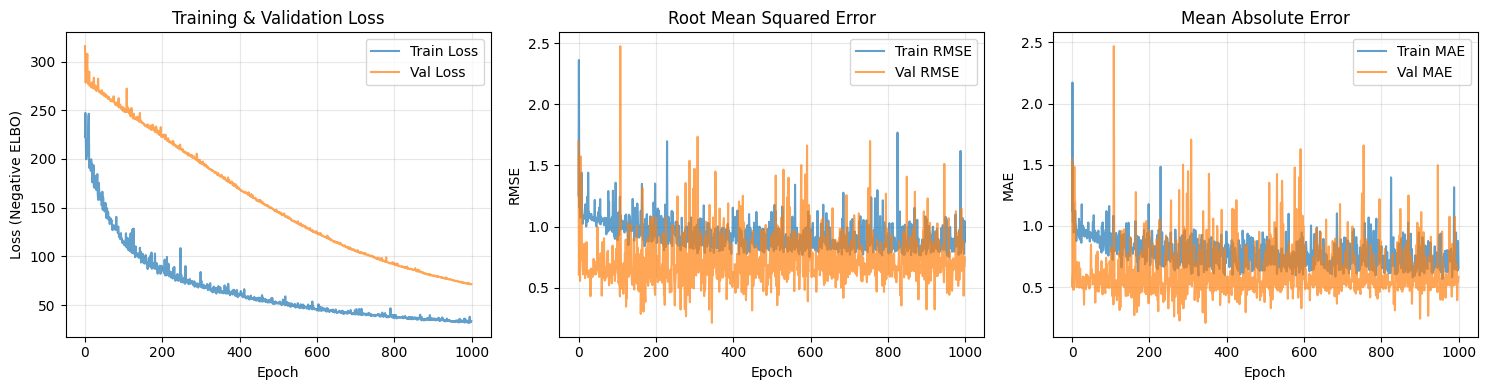


=== Final Metrics ===
Train - Loss: 33.5152, RMSE: 0.8756, MAE: 0.6581
Val   - Loss: 71.4246, RMSE: 0.7467, MAE: 0.5846


In [27]:
# Train with validation tracking
k = 1  # Function with enough samples
X = np.array(list(data[k].keys()), dtype=np.float32)
y = np.array(list(data[k].values()), dtype=np.float32)
y_norm = (y - y.mean()) / y.std()

model = BayesianNN(input_dim=dimensions[k], hidden_dims=[32, 16, 8])
model, history, (train_idx, val_idx) = train_bnn_with_validation(
    model, X, y_norm, val_split=0.2, epochs=1000, lr=0.01
)

# Plot all metrics
plot_validation_metrics(history)

# Check for overfitting
if history['val_rmse'][-1] > 1.5 * history['train_rmse'][-1]:
    print("⚠ Warning: Possible overfitting detected")


Epoch 0: Train Loss=246.3895, RMSE=1.2557 | Val Loss=261.3872, RMSE=0.4793
Epoch 200: Train Loss=80.6851, RMSE=0.6993 | Val Loss=200.2966, RMSE=0.4380
Epoch 400: Train Loss=59.5313, RMSE=0.5217 | Val Loss=173.0094, RMSE=0.5347
Epoch 600: Train Loss=52.9995, RMSE=0.5364 | Val Loss=146.7346, RMSE=0.2912
Epoch 800: Train Loss=43.4341, RMSE=0.5010 | Val Loss=122.9646, RMSE=0.2799


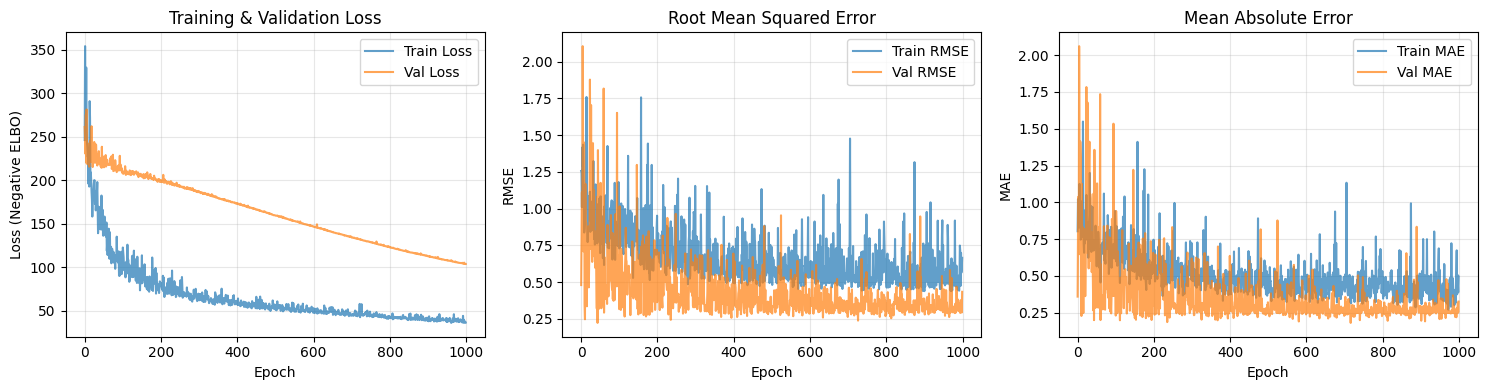


=== Final Metrics ===
Train - Loss: 36.5137, RMSE: 0.6645, MAE: 0.4959
Val   - Loss: 103.8077, RMSE: 0.4332, MAE: 0.3261


In [26]:
# Train with validation tracking
k = 2  # Function with enough samples
X = np.array(list(data[k].keys()), dtype=np.float32)
y = np.array(list(data[k].values()), dtype=np.float32)
y_norm = (y - y.mean()) / y.std()

model = BayesianNN(input_dim=dimensions[k], hidden_dims=[32, 16, 8])
model, history, (train_idx, val_idx) = train_bnn_with_validation(
    model, X, y_norm, val_split=0.2, epochs=1000, lr=0.01
)

# Plot all metrics
plot_validation_metrics(history)

# Check for overfitting
if history['val_rmse'][-1] > 1.5 * history['train_rmse'][-1]:
    print("⚠ Warning: Possible overfitting detected")


Epoch 0: Train Loss=413.4888, RMSE=1.0392 | Val Loss=376.0807, RMSE=1.3913
Epoch 200: Train Loss=96.8692, RMSE=0.9054 | Val Loss=149.5544, RMSE=1.3792
Epoch 400: Train Loss=72.2522, RMSE=0.7672 | Val Loss=121.4812, RMSE=1.1365
Epoch 600: Train Loss=53.6754, RMSE=0.6414 | Val Loss=106.2171, RMSE=1.0784
Epoch 800: Train Loss=44.3196, RMSE=1.1986 | Val Loss=94.1881, RMSE=0.9427


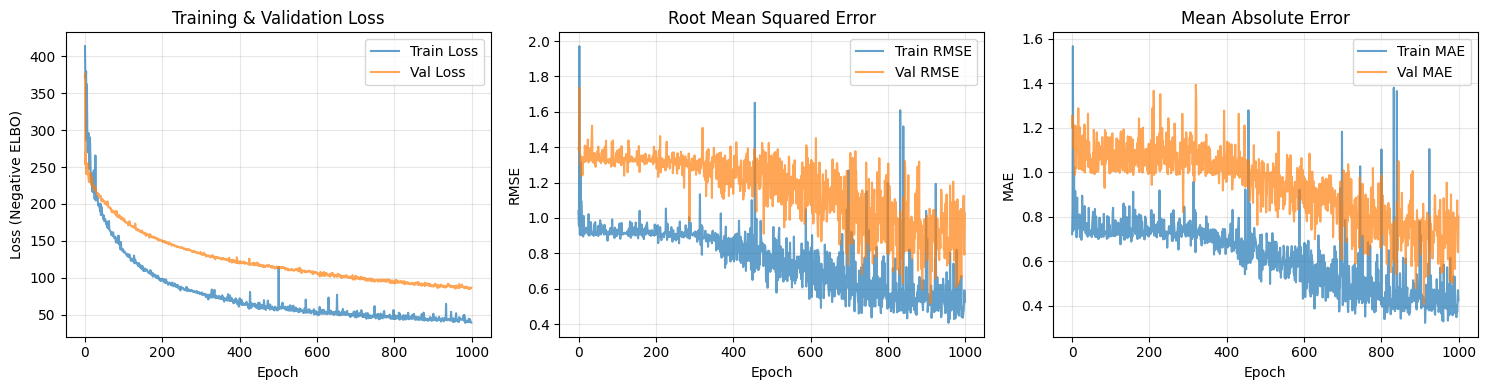


=== Final Metrics ===
Train - Loss: 39.5428, RMSE: 0.5251, MAE: 0.4256
Val   - Loss: 86.8525, RMSE: 1.0260, MAE: 0.8006
⚠ Warning: Possible overfitting detected


In [28]:
# Train with validation tracking
k = 3  # Function with enough samples
X = np.array(list(data[k].keys()), dtype=np.float32)
y = np.array(list(data[k].values()), dtype=np.float32)
y_norm = (y - y.mean()) / y.std()

model = BayesianNN(input_dim=dimensions[k], hidden_dims=[32, 16, 8])
model, history, (train_idx, val_idx) = train_bnn_with_validation(
    model, X, y_norm, val_split=0.2, epochs=1000, lr=0.01
)

# Plot all metrics
plot_validation_metrics(history)

# Check for overfitting
if history['val_rmse'][-1] > 1.5 * history['train_rmse'][-1]:
    print("⚠ Warning: Possible overfitting detected")


Epoch 0: Train Loss=259.9000, RMSE=1.1983 | Val Loss=203.8957, RMSE=0.7961
Epoch 200: Train Loss=80.4952, RMSE=0.6958 | Val Loss=162.3082, RMSE=0.6367
Epoch 400: Train Loss=49.7962, RMSE=0.6121 | Val Loss=129.7493, RMSE=0.4931
Epoch 600: Train Loss=57.1386, RMSE=0.6243 | Val Loss=109.8722, RMSE=0.5381
Epoch 800: Train Loss=35.9835, RMSE=0.6063 | Val Loss=92.4878, RMSE=0.2462


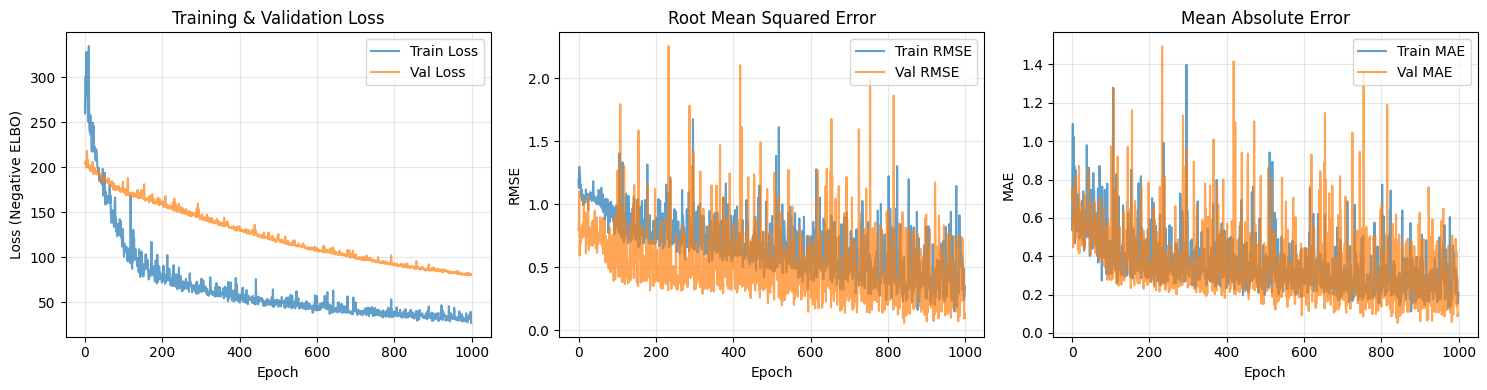


=== Final Metrics ===
Train - Loss: 27.3231, RMSE: 0.3492, MAE: 0.2072
Val   - Loss: 81.5921, RMSE: 0.0956, MAE: 0.0951


In [22]:
# Train with validation tracking
k = 4  # Function with enough samples
X = np.array(list(data[k].keys()), dtype=np.float32)
y = np.array(list(data[k].values()), dtype=np.float32)
y_norm = (y - y.mean()) / y.std()

model = BayesianNN(input_dim=dimensions[k], hidden_dims=[32, 16, 8])
model, history, (train_idx, val_idx) = train_bnn_with_validation(
    model, X, y_norm, val_split=0.2, epochs=1000, lr=0.01
)

# Plot all metrics
plot_validation_metrics(history)

# Check for overfitting
if history['val_rmse'][-1] > 1.5 * history['train_rmse'][-1]:
    print("⚠ Warning: Possible overfitting detected")


Epoch 0: Train Loss=401.0696, RMSE=1.1199 | Val Loss=201.7577, RMSE=0.7028
Epoch 200: Train Loss=71.0095, RMSE=0.7034 | Val Loss=191.2643, RMSE=1.0260
Epoch 400: Train Loss=57.1621, RMSE=0.5445 | Val Loss=165.0372, RMSE=0.6787
Epoch 600: Train Loss=52.3391, RMSE=0.5710 | Val Loss=139.8322, RMSE=0.8550
Epoch 800: Train Loss=49.5939, RMSE=0.5767 | Val Loss=120.2017, RMSE=0.7070


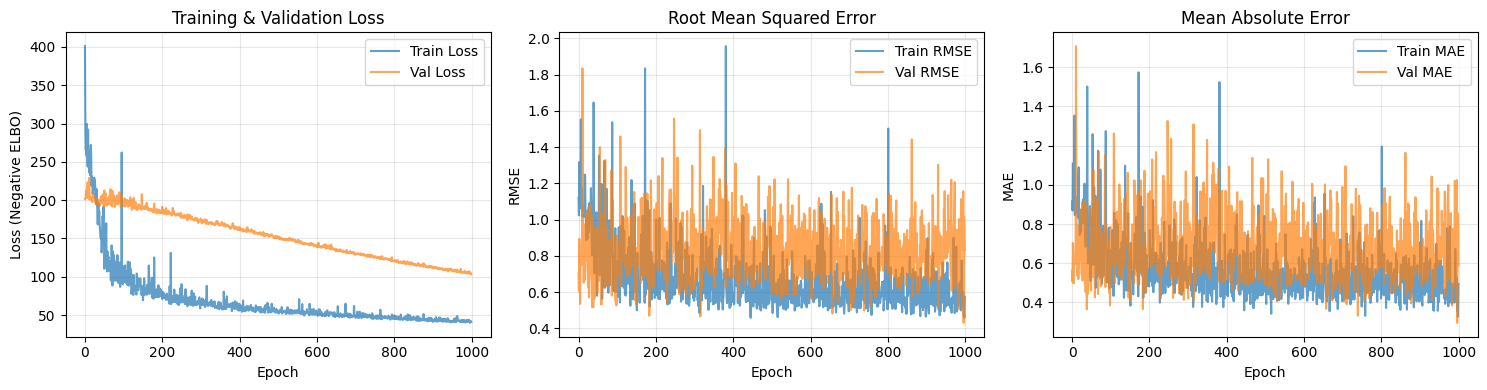


=== Final Metrics ===
Train - Loss: 41.0361, RMSE: 0.5733, MAE: 0.4946
Val   - Loss: 103.2849, RMSE: 0.8313, MAE: 0.5884


In [23]:
# Train with validation tracking
k = 5  # Function with enough samples
X = np.array(list(data[k].keys()), dtype=np.float32)
y = np.array(list(data[k].values()), dtype=np.float32)
y_norm = (y - y.mean()) / y.std()

model = BayesianNN(input_dim=dimensions[k], hidden_dims=[32, 16, 8])
model, history, (train_idx, val_idx) = train_bnn_with_validation(
    model, X, y_norm, val_split=0.2, epochs=1000, lr=0.01
)

# Plot all metrics
plot_validation_metrics(history)

# Check for overfitting
if history['val_rmse'][-1] > 1.5 * history['train_rmse'][-1]:
    print("⚠ Warning: Possible overfitting detected")


Epoch 0: Train Loss=404.1974, RMSE=0.9906 | Val Loss=245.8239, RMSE=1.2910
Epoch 200: Train Loss=69.4985, RMSE=0.7540 | Val Loss=143.9057, RMSE=1.0363
Epoch 400: Train Loss=51.5073, RMSE=0.5371 | Val Loss=129.3018, RMSE=0.5507
Epoch 600: Train Loss=45.3742, RMSE=0.3991 | Val Loss=114.0005, RMSE=0.4302
Epoch 800: Train Loss=41.5444, RMSE=0.5536 | Val Loss=102.3706, RMSE=0.4519


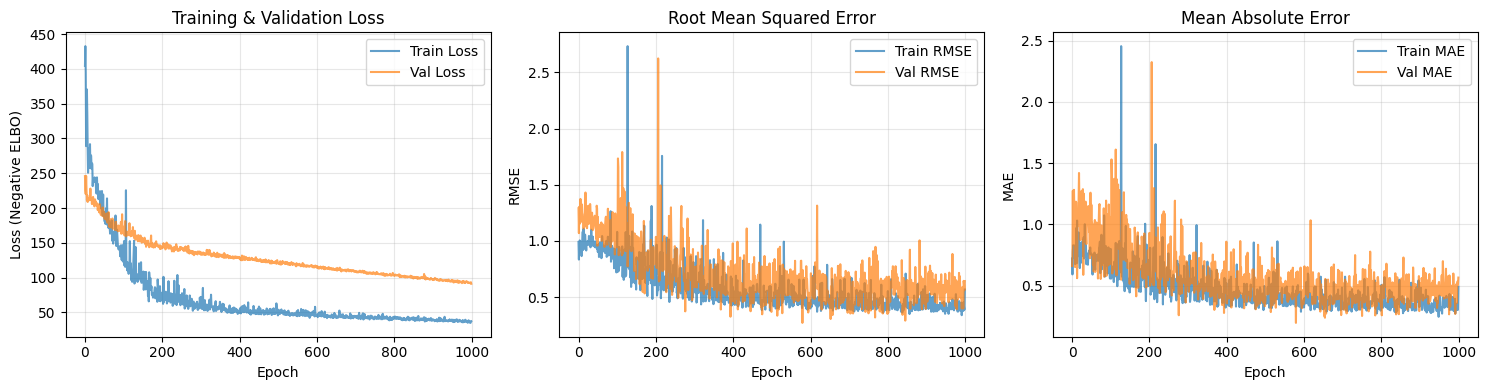


=== Final Metrics ===
Train - Loss: 37.2877, RMSE: 0.5672, MAE: 0.4895
Val   - Loss: 91.1269, RMSE: 0.6424, MAE: 0.5649


In [24]:
# Train with validation tracking
k = 6  # Function with enough samples
X = np.array(list(data[k].keys()), dtype=np.float32)
y = np.array(list(data[k].values()), dtype=np.float32)
y_norm = (y - y.mean()) / y.std()

model = BayesianNN(input_dim=dimensions[k], hidden_dims=[32, 16, 8])
model, history, (train_idx, val_idx) = train_bnn_with_validation(
    model, X, y_norm, val_split=0.2, epochs=1000, lr=0.01
)

# Plot all metrics
plot_validation_metrics(history)

# Check for overfitting
if history['val_rmse'][-1] > 1.5 * history['train_rmse'][-1]:
    print("⚠ Warning: Possible overfitting detected")


Epoch 0: Train Loss=720.9796, RMSE=1.0377 | Val Loss=207.1701, RMSE=0.7509
Epoch 200: Train Loss=92.8489, RMSE=0.5958 | Val Loss=131.3776, RMSE=0.7757
Epoch 400: Train Loss=67.4756, RMSE=0.4601 | Val Loss=122.1665, RMSE=0.6737
Epoch 600: Train Loss=49.2248, RMSE=0.5287 | Val Loss=115.6700, RMSE=1.3339
Epoch 800: Train Loss=46.6289, RMSE=0.4757 | Val Loss=112.1495, RMSE=0.5943


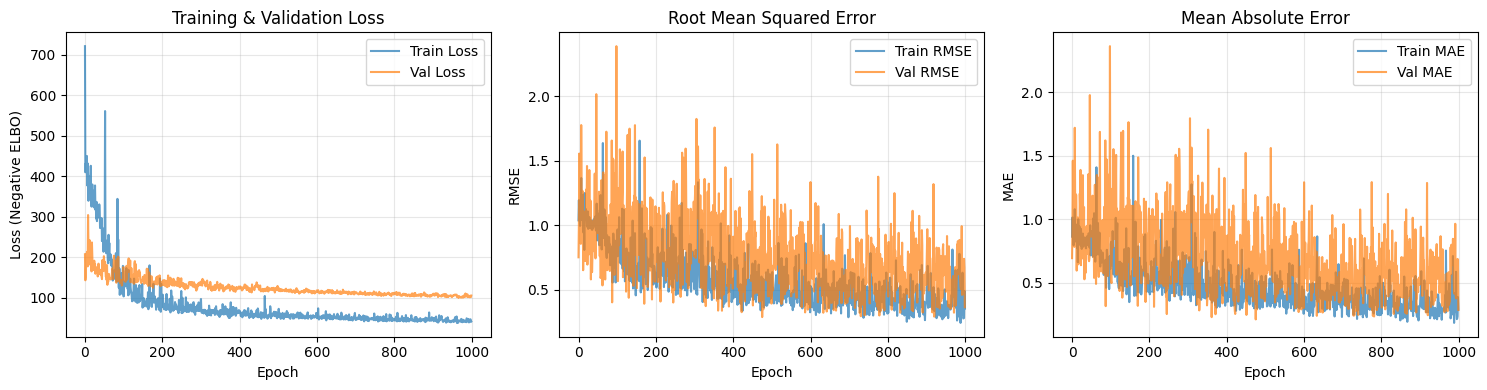


=== Final Metrics ===
Train - Loss: 41.0111, RMSE: 0.3533, MAE: 0.2880
Val   - Loss: 105.3051, RMSE: 0.3639, MAE: 0.2856


In [25]:
# Train with validation tracking
k = 7  # Function with enough samples
X = np.array(list(data[k].keys()), dtype=np.float32)
y = np.array(list(data[k].values()), dtype=np.float32)
y_norm = (y - y.mean()) / y.std()

model = BayesianNN(input_dim=dimensions[k], hidden_dims=[32, 16, 8])
model, history, (train_idx, val_idx) = train_bnn_with_validation(
    model, X, y_norm, val_split=0.2, epochs=1000, lr=0.01
)

# Plot all metrics
plot_validation_metrics(history)

# Check for overfitting
if history['val_rmse'][-1] > 1.5 * history['train_rmse'][-1]:
    print("⚠ Warning: Possible overfitting detected")


### Cross validation

In [29]:
# 1. K-FOLD CROSS-VALIDATION FOR BNN
def kfold_cv_bnn(k, n_folds=3, epochs=1000, lr=0.01, hidden_dims=[32, 16, 8]):
    """
    K-fold cross-validation for BNN on function k
    
    Parameters:
    - k: function index (0-7)
    - n_folds: number of folds for cross-validation
    - epochs: training epochs per fold
    - lr: learning rate
    - hidden_dims: hidden layer sizes
    
    Returns:
    - cv_results: dict with fold metrics, models, and normalization params
    """
    from sklearn.model_selection import KFold
    import torch
    from torch.distributions import Normal
    
    # Extract data from dict
    X = np.array(list(data[k].keys()), dtype=np.float32)
    y = np.array(list(data[k].values()), dtype=np.float32)
    
    # Normalize
    y_mean, y_std = y.mean(), y.std()
    y_norm = (y - y_mean) / (y_std + 1e-8)
    
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    cv_results = {
        'fold_metrics': [],
        'models': [],
        'y_mean': y_mean,
        'y_std': y_std
    }
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X)):
        print(f"\n--- Fold {fold+1}/{n_folds} ---")
        
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y_norm[train_idx], y_norm[val_idx]
        
        # Train model for this fold
        model = BayesianNN(input_dim=dimensions[k], hidden_dims=hidden_dims)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        
        X_train_t = torch.tensor(X_train, dtype=torch.float32)
        y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)
        
        for epoch in range(epochs):
            optimizer.zero_grad()
            
            log_liks = []
            for _ in range(5):
                pred = model(X_train_t)
                noise_std = torch.exp(0.5 * model.log_noise)
                dist = Normal(pred, noise_std)
                log_liks.append(dist.log_prob(y_train_t).sum())
            
            avg_log_lik = torch.stack(log_liks).mean()
            kl = model.kl_divergence() / len(X_train)
            loss = -avg_log_lik + kl
            
            loss.backward()
            optimizer.step()
        
        # Evaluate on validation set
        pred_mean, pred_std = model.predict(X_val, n_samples=100)
        
        # Compute metrics (in original scale)
        pred_mean_orig = pred_mean * y_std + y_mean
        pred_std_orig = pred_std * y_std
        y_val_orig = y_val * y_std + y_mean
        
        rmse = np.sqrt(np.mean((pred_mean_orig - y_val_orig)**2))
        mae = np.mean(np.abs(pred_mean_orig - y_val_orig))
        
        # Calibration: are ~68% of points within 1 std?
        within_1std = np.abs(pred_mean_orig - y_val_orig) <= pred_std_orig
        calibration = within_1std.mean()
        
        fold_metrics = {
            'rmse': rmse,
            'mae': mae,
            'calibration': calibration,
            'train_size': len(X_train),
            'val_size': len(X_val)
        }
        
        print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, Calibration: {calibration:.2%}")
        
        cv_results['fold_metrics'].append(fold_metrics)
        cv_results['models'].append(model)
    
    # Aggregate results
    avg_rmse = np.mean([m['rmse'] for m in cv_results['fold_metrics']])
    avg_mae = np.mean([m['mae'] for m in cv_results['fold_metrics']])
    avg_cal = np.mean([m['calibration'] for m in cv_results['fold_metrics']])
    
    print(f"\n=== CV Results for Function {k} ===")
    print(f"Average RMSE: {avg_rmse:.4f} ± {np.std([m['rmse'] for m in cv_results['fold_metrics']]):.4f}")
    print(f"Average MAE:  {avg_mae:.4f} ± {np.std([m['mae'] for m in cv_results['fold_metrics']]):.4f}")
    print(f"Average Calibration: {avg_cal:.2%} (target: ~68%)")
    
    return cv_results


# 2. PLOT CALIBRATION (Predicted vs Actual with Uncertainty)
def plot_calibration(k, cv_results):
    """
    Plot predicted vs actual with uncertainty bands for each CV fold
    
    Parameters:
    - k: function index
    - cv_results: output from kfold_cv_bnn()
    
    Shows how well the model's predictions match actual values,
    with error bars showing the uncertainty estimates
    """
    import matplotlib.pyplot as plt
    
    n_models = len(cv_results['models'])
    fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 4))
    if n_models == 1:
        axes = [axes]
    
    # Extract data from dict
    X = np.array(list(data[k].keys()), dtype=np.float32)
    y = np.array(list(data[k].values()), dtype=np.float32)
    
    for fold, (model, ax) in enumerate(zip(cv_results['models'], axes)):
        pred_mean, pred_std = model.predict(X, n_samples=100)
        
        # Convert to original scale
        y_mean, y_std = cv_results['y_mean'], cv_results['y_std']
        pred_mean_orig = pred_mean * y_std + y_mean
        pred_std_orig = pred_std * y_std
        
        # Plot with error bars
        ax.errorbar(y, pred_mean_orig, yerr=pred_std_orig, 
                    fmt='o', alpha=0.6, capsize=3, label='Predictions')
        
        # Diagonal line (perfect prediction)
        lims = [min(y.min(), pred_mean_orig.min()), 
                max(y.max(), pred_mean_orig.max())]
        ax.plot(lims, lims, 'r--', alpha=0.5, linewidth=2, label='Perfect')
        
        ax.set_xlabel('Actual Value')
        ax.set_ylabel('Predicted Value')
        ax.set_title(f'Fold {fold+1}')
        ax.grid(True, alpha=0.3)
        ax.legend()
        ax.set_aspect('equal', adjustable='box')
    
    fig.suptitle(f'Function {k}: Calibration Plot (Predicted vs Actual)', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()



--- Fold 1/3 ---
RMSE: 0.0798, MAE: 0.0328, Calibration: 83.33%

--- Fold 2/3 ---
RMSE: 0.0179, MAE: 0.0175, Calibration: 20.00%

--- Fold 3/3 ---
RMSE: 0.0186, MAE: 0.0186, Calibration: 100.00%

=== CV Results for Function 0 ===
Average RMSE: 0.0388 ± 0.0290
Average MAE:  0.0230 ± 0.0070
Average Calibration: 67.78% (target: ~68%)


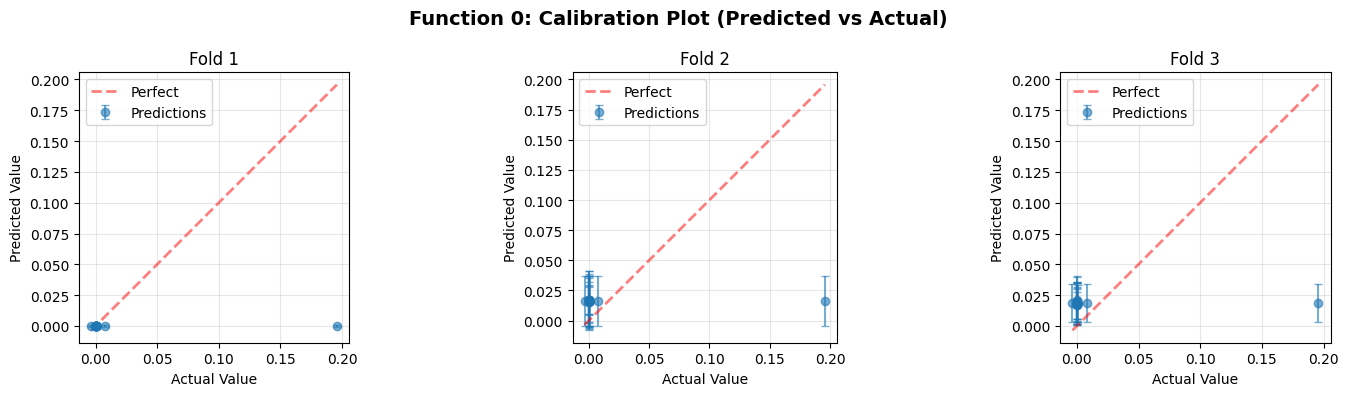

In [30]:
# Example 2: K-fold CV (recommended for small datasets)
cv_results_0 = kfold_cv_bnn(k=0, n_folds=3, epochs=1000, lr=0.01)
plot_calibration(0, cv_results_0)



In [31]:
# Example 3: Run CV for all functions
all_cv_results = {}
for k in range(8):
    print(f"\n{'='*60}")
    print(f"Function {k} (n={len(data[k])} samples)")
    print('='*60)
    
    # Use fewer folds for very small datasets
    n_folds = 3 if len(data[k]) >= 15 else 2
    
    all_cv_results[k] = kfold_cv_bnn(k, n_folds=n_folds, epochs=1000)




Function 0 (n=16 samples)

--- Fold 1/3 ---
RMSE: 0.0796, MAE: 0.0330, Calibration: 83.33%

--- Fold 2/3 ---
RMSE: 0.0183, MAE: 0.0179, Calibration: 40.00%

--- Fold 3/3 ---
RMSE: 0.0173, MAE: 0.0173, Calibration: 80.00%

=== CV Results for Function 0 ===
Average RMSE: 0.0384 ± 0.0291
Average MAE:  0.0228 ± 0.0073
Average Calibration: 67.78% (target: ~68%)

Function 1 (n=16 samples)

--- Fold 1/3 ---
RMSE: 0.2757, MAE: 0.2317, Calibration: 16.67%

--- Fold 2/3 ---
RMSE: 0.2560, MAE: 0.2256, Calibration: 0.00%

--- Fold 3/3 ---
RMSE: 0.1891, MAE: 0.1550, Calibration: 40.00%

=== CV Results for Function 1 ===
Average RMSE: 0.2403 ± 0.0371
Average MAE:  0.2041 ± 0.0348
Average Calibration: 18.89% (target: ~68%)

Function 2 (n=21 samples)

--- Fold 1/3 ---
RMSE: 0.0964, MAE: 0.0788, Calibration: 0.00%

--- Fold 2/3 ---
RMSE: 0.0950, MAE: 0.0630, Calibration: 14.29%

--- Fold 3/3 ---
RMSE: 0.1326, MAE: 0.1185, Calibration: 28.57%

=== CV Results for Function 2 ===
Average RMSE: 0.1080 ± 0.

In [32]:
# Example 4: Compare validation metrics across functions
print("\n" + "="*60)
print("VALIDATION SUMMARY ACROSS ALL FUNCTIONS")
print("="*60)
for k in range(8):
    metrics = all_cv_results[k]['fold_metrics']
    avg_rmse = np.mean([m['rmse'] for m in metrics])
    avg_cal = np.mean([m['calibration'] for m in metrics])
    print(f"Function {k}: RMSE={avg_rmse:.4f}, Calibration={avg_cal:.2%}")



VALIDATION SUMMARY ACROSS ALL FUNCTIONS
Function 0: RMSE=0.0384, Calibration=67.78%
Function 1: RMSE=0.2403, Calibration=18.89%
Function 2: RMSE=0.1080, Calibration=14.29%
Function 3: RMSE=7.1850, Calibration=38.89%
Function 4: RMSE=690.9321, Calibration=61.57%
Function 5: RMSE=0.4207, Calibration=27.78%
Function 6: RMSE=0.2924, Calibration=30.56%
Function 7: RMSE=0.4965, Calibration=46.11%
